In [2]:
import torch
import numpy as np
from torchvision import datasets,transforms

In [3]:
from torch import nn, optim
import torch.nn.functional as F

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5),(0.5))
                               ])

In [5]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim = 1)
        return x

In [ ]:
model = classifier()

In [ ]:
critertion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)

In [ ]:
epochs = 30
steps = 0
train_losses, test_losses = [],[]

for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        out = model(images)
        loss = critertion(out, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                test_out = model(images)
                test_loss += critertion(test_out,labels)
                
                ps = torch.exp(test_out)
                _,top_class = ps.topk(1,dim =1)
                equals = top_class == labels.view(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epochs: {}/{}".format(i+1,epochs),
             "Training loss: {}".format(running_loss/len(trainloader)),
              "Testing loss: {}".format(test_loss/len(testloader)),
              "Test Accuracy: {}".format(accuracy/len(testloader))
             )
        
        
        

In [12]:
import matplotlib.pyplot as plt

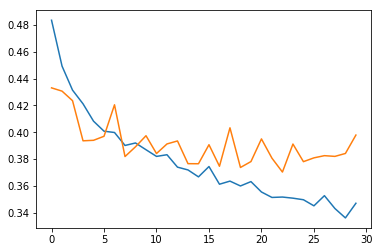

In [13]:
plt.plot(range(30), train_losses)
plt.plot(range(30), test_losses)

In [6]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(0.2)
        
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

        

In [7]:
model = Classifier()


In [8]:
critertion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003 )

In [11]:
epochs = 30
train_losses, test_losses = [],[]

for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        model.train()
        optimizer.zero_grad()

        out = model(images)
        test_loss = critertion(out,labels)
        test_loss.backward()
        optimizer.step()
        
        running_loss += test_loss
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                model.eval()
                test_out = model(images)
                test_loss += critertion(test_out,labels)
                
                ps = torch.exp(test_out)
                _, top_class = ps.topk(1,dim =1)
                equals = top_class == labels.view(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epochs: {}/{}".format(i+1,epochs),
             "Training loss: {}".format(running_loss/len(trainloader)),
              "Testing loss: {}".format(test_loss/len(testloader)),
              "Test Accuracy: {}".format(accuracy/len(testloader))
             )
                
        

Epochs: 1/30 Training loss: 0.4833551049232483 Testing loss: 0.4330412745475769 Test Accuracy: 0.8450437784194946
Epochs: 2/30 Training loss: 0.4492284059524536 Testing loss: 0.4306095242500305 Test Accuracy: 0.8511146306991577
Epochs: 3/30 Training loss: 0.43134599924087524 Testing loss: 0.42349714040756226 Test Accuracy: 0.8436504602432251
Epochs: 4/30 Training loss: 0.421158105134964 Testing loss: 0.39364537596702576 Test Accuracy: 0.8539012670516968
Epochs: 5/30 Training loss: 0.4082551598548889 Testing loss: 0.39401620626449585 Test Accuracy: 0.8586783409118652
Epochs: 6/30 Training loss: 0.4007987976074219 Testing loss: 0.3970181941986084 Test Accuracy: 0.8631568551063538
Epochs: 7/30 Training loss: 0.3998246490955353 Testing loss: 0.42044445872306824 Test Accuracy: 0.852707028388977
Epochs: 8/30 Training loss: 0.39018383622169495 Testing loss: 0.38192296028137207 Test Accuracy: 0.8596735596656799
Epochs: 9/30 Training loss: 0.3920302987098694 Testing loss: 0.3892086148262024 Tes